In [2]:
from sklearn.datasets import fetch_openml
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [3]:
#Loading the MNIST data
mnist =  fetch_openml('mnist_784', version=1, cache=True)

In [4]:
print(mnist.data.shape)

(70000, 784)


In [5]:
print(mnist.target.shape)

(70000,)


In [6]:
#sklearn_to_df
df= pd.DataFrame(mnist.data,columns=mnist.feature_names)
df['target'] = pd.Series(mnist.target)

In [7]:
print(df.head())

   pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

   pixel10  ...  pixel776  pixel777  pixel778  pixel779  pixel780  pixel781  \
0      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
1      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
2      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
3      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
4      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   

   pixel782  pixel783  pixel784  target  
0       0.0       0.

In [8]:
print(df.describe())

        pixel1   pixel2   pixel3   pixel4   pixel5   pixel6   pixel7   pixel8  \
count  70000.0  70000.0  70000.0  70000.0  70000.0  70000.0  70000.0  70000.0   
mean       0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
std        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
min        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
25%        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
50%        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
75%        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
max        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   

        pixel9  pixel10  ...      pixel775      pixel776      pixel777  \
count  70000.0  70000.0  ...  70000.000000  70000.000000  70000.000000   
mean       0.0      0.0  ...      0.197414      0.099543      0.046629   
std        0.0      0.0  ...      5.991206      

In [10]:
print(df.tail())

       pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
69995     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69996     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69997     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69998     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69999     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

       pixel10  ...  pixel776  pixel777  pixel778  pixel779  pixel780  \
69995      0.0  ...       0.0       0.0       0.0       0.0       0.0   
69996      0.0  ...       0.0       0.0       0.0       0.0       0.0   
69997      0.0  ...       0.0       0.0       0.0       0.0       0.0   
69998      0.0  ...       0.0       0.0       0.0       0.0       0.0   
69999      0.0  ...       0.0       0.0       0.0       0.0       0.0   

       pixel781  pixel782  pixel783  pixel784  target  
69995       0.0   

In [11]:
#Separate Features and Labels(target)
X, y = df.drop(labels = ["target"],axis = 1).to_numpy(), df["target"]

In [12]:
print(y)

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: target, Length: 70000, dtype: object


In [13]:
print(X)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


0


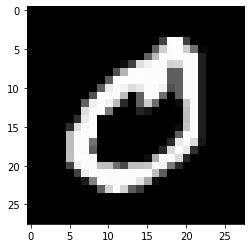

In [14]:
#plot some digit
some_digit = X[21]
plt.gray()
some_digit_show = plt.imshow(X[21].reshape(28,28))
print(y[21])

In [17]:
#Spliting Train and Test sets
y = y.astype(np.uint8)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [18]:
#Training a binary classifier
y_train_0 = (y_train == 0)
y_test_0 = (y_test == 0)

sgd_clf = SGDClassifier(max_iter=1000,random_state = 42)
sgd_clf.fit(X_train, y_train_0)
print(sgd_clf.predict([some_digit])) #predict it's zero or not

[ True]


In [19]:
#Cross Validation
cv_score_sgd = cross_val_score(sgd_clf, X_train, y_train_0, cv = 3, scoring = "accuracy")
cv_score_sgd = np.mean(cv_score_sgd)
print(cv_score_sgd)

0.9871904761904761


[[56411   369]
 [  438  5782]]


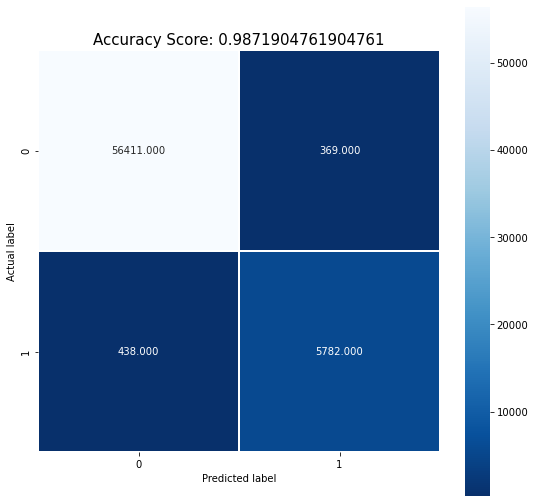

In [20]:
#CM
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_0, cv= 3)
cm=confusion_matrix(y_train_0, y_train_pred)
print(cm)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(cv_score_sgd)
plt.title(all_sample_title, size = 15);

In [21]:
#training for multiclass-classification
sgd_clf.fit(X_train, y_train)
y_train_pred = sgd_clf.predict(X_train)
print(y_train_pred)
print(y_train)

[5 7 6 ... 1 0 0]
42878    8
5946     7
33058    6
34692    5
59232    4
        ..
37194    6
6265     6
54886    1
860      0
15795    0
Name: target, Length: 63000, dtype: uint8


In [26]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_train,y_train_pred)
print(score)

0.8732222222222222


[[6076    1   21   16    0   52    1   11   27   15]
 [   1 6956   28   12    1   26    2    7   37    7]
 [  42   79 5289  160   18   58   30  171  434   35]
 [  28   26  118 5264    1  545    2   78  127  192]
 [  29   82  118  125 4277  101   22  231  180 1048]
 [  40   22   27   74    4 5286   18   16  114   54]
 [  71   20  128   34   10  530 5307   14   82    3]
 [  16   47   19   16    5   35    3 6123   14  291]
 [  46  136   62  278    9  538   11   53 4841  158]
 [  24   42   15   57   27   98    0  305   76 5594]]


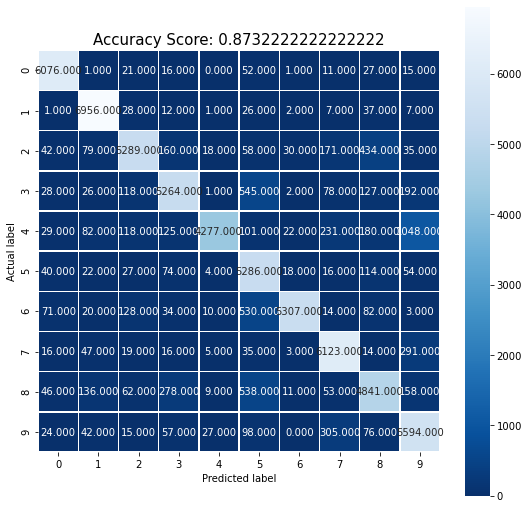

In [23]:
cm = confusion_matrix(y_train, y_train_pred)
print(cm)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);